In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

## This is the function to optimize: substitute A with vandermonde, x with theta, b with y. Also introduce the penalty term 1/sigma

In [ ]:
def loss(x):
    n = x.shape[0]
    v = np.linspace(0,1,n)
    x_true = np.ones((n,))
    A = np.vander(v, increasing=True)
    b = A @ x_true
    return 0.5*np.linalg.norm(A@x_true-b)**2

def grad_loss(x):
    n = x.shape[0]
    v = np.linspace(0,1,n)
    x_true = np.ones((n,))
    A = np.vander(v, increasing=True)
    b = A @ x_true
    return A.T@(A@x-b)

In [28]:
def create_data(a, b, K, N, sigma, theta_true):
    e = np.random.normal(0, sigma, (N,))
    X = np.linspace(a, b, N)
    Y = vandermonde(X,K)@theta_true + e 
    return X, Y

def train_test_split(X, Y, N_train):
    idx = np.arange(0,X.shape[-1])
    np.random.shuffle(idx)
    X_train = X[idx[:N_train]]
    y_train = Y[idx[:N_train]]
    X_test = X[idx[N_train:]]
    y_test =Y[idx[N_train:]]
    
    return X_train, X_test, y_train, y_test

In [1]:
def backtracking(f, grad_f, x, multivariate):
    
    if multivariate:
        norm = np.linalg.norm
    else:
        norm = np.abs

    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x, X, Y), X, Y) > f(x, X, Y) - c * alpha * norm(grad_f(x, X, Y)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha


def GD(f, grad_f, x0, kmax, tolf, tolx, back_tracking=False, alpha=1, multivariate=True):
    
    if multivariate:
        norm = np.linalg.norm
    else:
        norm = np.abs

    # Initialize x_k
    x_k = x0

    # counter
    k = 0

    # Loop
    condition = True
    while condition:
        # Update alpha
        if back_tracking:
            alpha = backtracking(f, grad_f, x_k, multivariate)
        # Update x
        x_k = x_k - alpha * grad_f(x_k, X, Y)

        # check criteria
        condition1 = norm(grad_f(x_k, X, Y)) > (tolf * norm(grad_f(x0, X, Y)))
        condition2 = norm(x_k) > tolx
        condition3 = k < kmax
        condition = condition1 and condition2 and condition3

        # update k
        k += 1

    return x_k#, k, np.array(x), np.array(f_val), np.array(grads), np.array(err)


def SGD(loss, grad_loss, w0, D, batch_size, n_epochs, learning_rate=1e-3):
    # Initialize the parameters w
    w = w0
        
    # Extract X and y from D
    X, y = D
    
    # Save in memory the length of X (and y)    They have the same dimension
    N = X.shape[-1]
    
    # We assume that batch_size divides N
    # Compute the number of batches per epoch
    
    n_batch_per_epoch = N // batch_size # integer division in case batch_size doesn't divide N
    
    # Iterate over the epochs
    for epoch in range(n_epochs):
        idx = np.arange(N)
        np.random.shuffle(idx)
        
        # Batch iteration
        for k in range(n_batch_per_epoch):
            X_batch = X[idx[k * batch_size : (k+1) * batch_size]]
            y_batch = y[idx[k * batch_size : (k+1) * batch_size]]
            
            B = (X_batch, y_batch) # it should not be necessary to define B.
            
            gradient = grad_loss(w, X_batch, y_batch)
            w = w - learning_rate * gradient
                        
    return w

def NEQ():
    pass

In [29]:
def vandermonde(X, K):
    N = X.shape[-1]
    Phi = np.zeros((N, K))
    for k in range(K):
        Phi[:, k] = X**k  
    return Phi

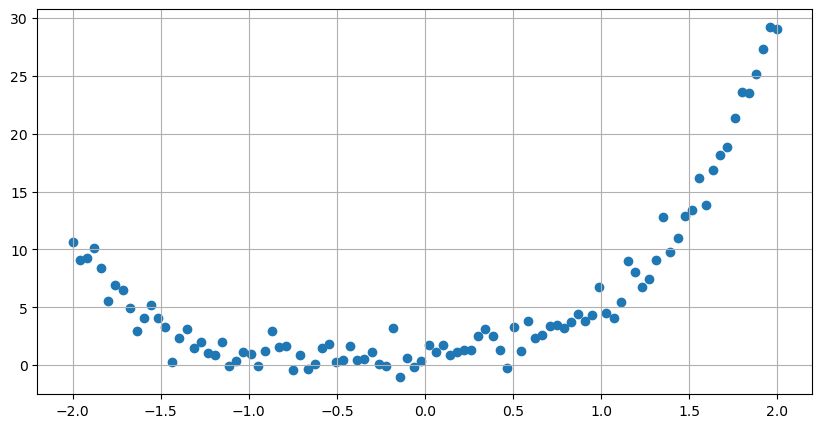

In [36]:
a,b,K,N,sigma = [-2,2,5,100,1]
theta_true = np.ones(K)
X,Y = create_data(a, b, K, N,  sigma, theta_true)

plt.figure(figsize=(10,5))
plt.scatter(X,Y)
plt.grid()
plt.show()

In [ ]:
def MAP():